# Week1
diabetes 데이터에 대해 1d-CNN을 적용하여 classification과 Regression을 진행한다.

이때, timeseries data에 CNN을 적용하기 위해 sequence_split함수가 선행되어야 한다.

## Data Preprocessing

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [150]:
df = pd.read_csv('../dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [154]:
df.shape

(768, 9)

In [156]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [158]:
'''
    Pregnancies: 임신 횟수
    Glucose: 포도당 수치
    BloodPressure: 혈압
    SkinThickness: 피부 두께
    Insulin: 인슐린 수치
    BMI: 체질량지수 (BMI)
    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수
    Age: 나이
    Outcome: 결과 (당뇨병 여부)
'''

'\n    Pregnancies: 임신 횟수\n    Glucose: 포도당 수치\n    BloodPressure: 혈압\n    SkinThickness: 피부 두께\n    Insulin: 인슐린 수치\n    BMI: 체질량지수 (BMI)\n    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수\n    Age: 나이\n    Outcome: 결과 (당뇨병 여부)\n'

In [160]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_2928\1589747868.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


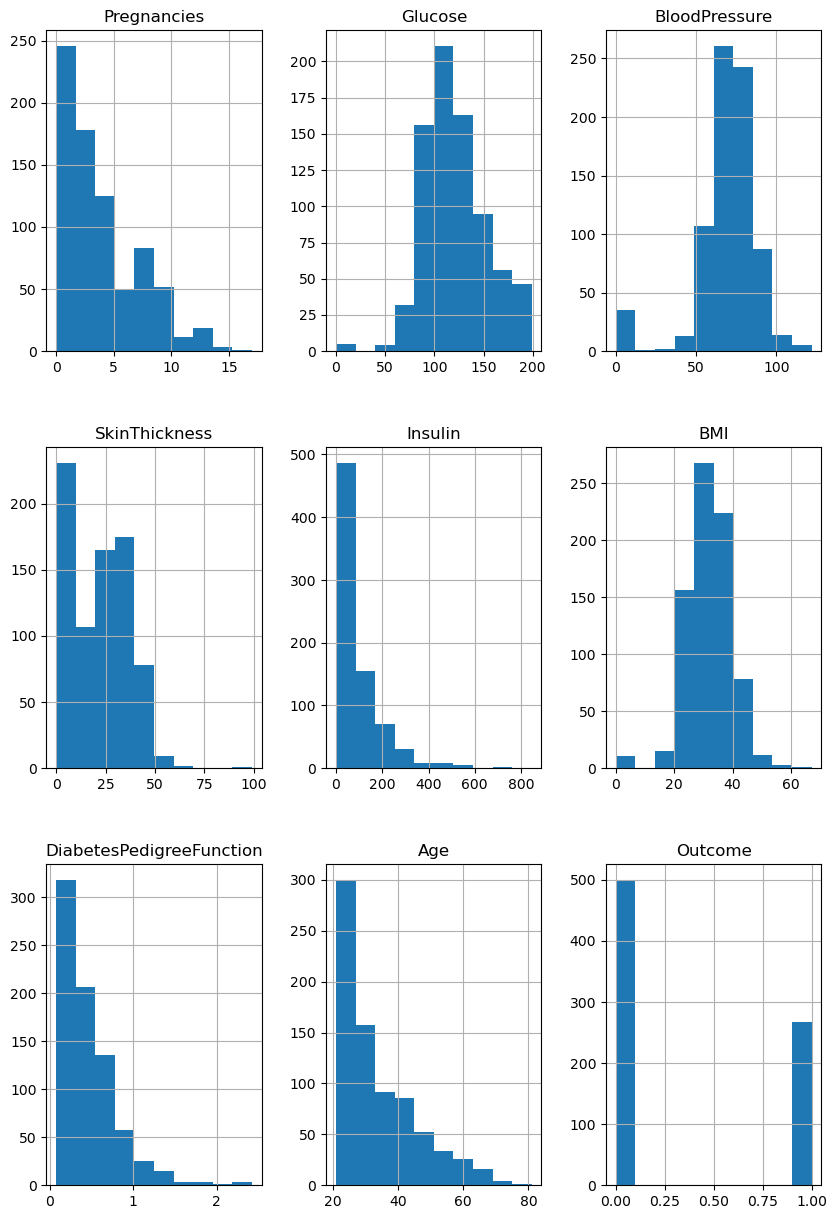

In [162]:
# 시각화
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [163]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

Text(0.5, 1.0, 'Outcome')

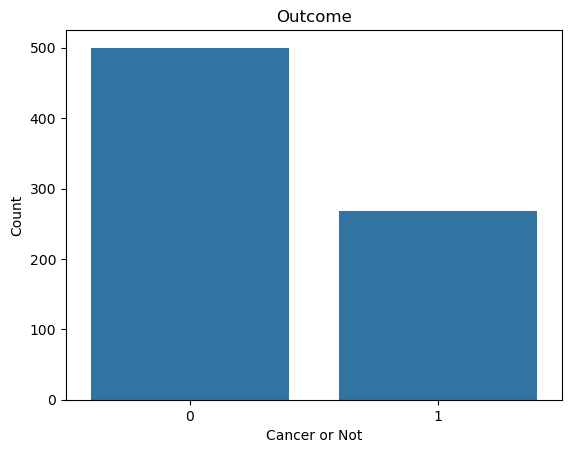

In [166]:
# 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [168]:
# Outcome 개수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [170]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = 0.25, stratify=y, random_state = 0)

In [174]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Sequence Split
class의 최빈값을 y로 하는 Sequential data를 반환하도록 하자.

도메인 지식이 필요하다. 당뇨병을 잘못 예측하는 것은 치명적인가?
치명적일 것으로 보인다. 그러므로 최빈값이 아닌 적어도 하나가 1이면 1이 되도록 수정하겠다.

In [177]:
from scipy.stats import mode
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        
        seq_x = sequences[i:end_ix, :-1]
        
        # 출력 y는 마지막 열에서 적어도 하나가 1이면 1
        if np.any(sequences[i:end_ix, -1] == 1):
            seq_y = 1
        else:
            seq_y = 0
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

split_sequence 함수를 통해 앞의 5명 데이터를 사용해 다음 데이터에 대한 당뇨 여부를 확인하도록 구성해보자.  
사실 당뇨 데이터는 시계열 데이터가 아니라 순환 데이터로 만드는 게 적합하지 않을 것 같다. 하지만 학습 목적으로 진행해보자.  

In [180]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

In [182]:
X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(572, 5, 8) (572,)
(188, 5, 8) (188,)


In [185]:
# One-Hot Encode
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

## Classification
### Design model

In [188]:
# classifier
from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout

n_timestemps, n_feautes, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

classifier = keras.Sequential()
classifier.add(Input(shape=(n_timestemps,n_feautes)))

# convolution layer
classifier.add(Conv1D(64, kernel_size=5, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

classifier.add(Conv1D(32, kernel_size=3, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

classifier.add(Conv1D(8, kernel_size=3, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

# output layer
classifier.add(Flatten())
classifier.add(Dense(2, activation='sigmoid'))

In [190]:
# optimizer, lossfunction
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [192]:
# keras.utils.plot_model(model)
classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 5, 64)               │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 3, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 2, 8)                │             776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 1, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,594 (37.48 KB)

 Trainable params: 9,594 (37.48 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = classifier.fit(X_train, y_train_onehot, validation_split=0.1, 
                    epochs=30, callbacks=[early_stopping_cb])

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5791 - loss: 0.6650 - val_accuracy: 1.0000 - val_loss: 0.2540
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8457 - loss: 0.4182 - val_accuracy: 1.0000 - val_loss: 0.1631
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8729 - loss: 0.3516 - val_accuracy: 1.0000 - val_loss: 0.1356
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8539 - loss: 0.3514 - val_accuracy: 1.0000 - val_loss: 0.1500
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8982 - loss: 0.3005 - val_accuracy: 0.9828 - val_loss: 0.1694


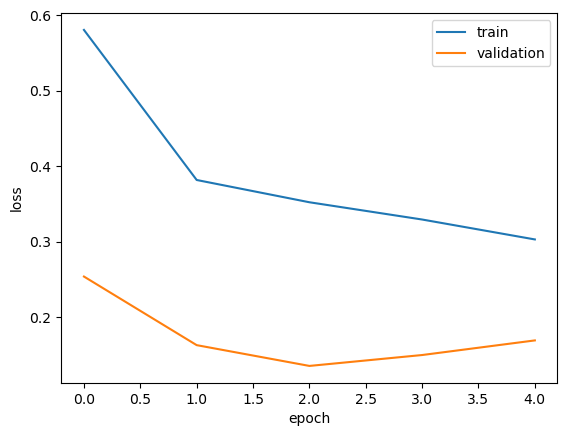

In [195]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [196]:
early_stopping_cb.stopped_epoch

4

In [197]:
classifier.evaluate(X_test, y_test_onehot)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8782 - loss: 0.3469 


[0.3086039423942566, 0.9042553305625916]

문제상황  
당뇨병을 검출하는 것이 중요하다고 생각하여 하나라도 1이면 1로 예측하게 했다. 그랬더니 대부분이 예측이 맞아 정확도가 매우 높아졌다. 이렇게 모델을 설계하는 것이 맞을지 의문이다. 더 공부해 보도록 하자.

In [199]:
y_pred = classifier.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [205]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.90      1.00      0.95       169

    accuracy                           0.90       188
   macro avg       0.95      0.53      0.52       188
weighted avg       0.91      0.90      0.86       188

[[  1  18]
 [  0 169]]


In [207]:
model_file = '../diabetes_cnn_clf.keras'
keras.models.save_model(classifier, model_file, include_optimizer=False)
print('model saved at ', model_file)

model saved at  ../diabetes_cnn_clf.keras


## Regression
### Structure model

In [210]:
X = df.drop(['BMI', 'Outcome'], axis=1)
y = df['BMI']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [214]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [216]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

In [218]:
# Split sequence 재정의
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        # 입력 시퀀스는 마지막 열을 제외한 값
        seq_x = sequences[i:end_ix, :-1]
        # 출력 y는 마지막 열의 평균값
        seq_y = np.mean(sequences[i:end_ix, -1])
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [220]:
X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(610, 5, 7) (610,)
(150, 5, 7) (150,)


In [222]:
# One-Hot Encode
# y_train_onehot = pd.get_dummies(y_train).values
# y_test_onehot = pd.get_dummies(y_test).values

🤔 Regression에서 one-hot encoding하는 이유를 잘 모르겠다.

In [225]:
# regressor
n_timestemps, n_feautes, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

regressor = keras.Sequential()
regressor.add(Input(shape=(n_timestemps,n_feautes)))

# convolution layer
regressor.add(Conv1D(64, kernel_size=5, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

regressor.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

# output layer
regressor.add(Flatten())
regressor.add(Dense(1))

In [227]:
# optimizer, lossfunction
regressor.compile(loss='mse', metrics=['mse'])

In [229]:
# keras.utils.plot_model(model)
regressor.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)                   │ (None, 5, 64)               │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 3, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,545 (33.38 KB)

 Trainable params: 8,545 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

In [231]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = regressor.fit(X_train, y_train, validation_split=0.1, batch_size=32,
                    epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 926.5014 - mse: 926.5014 - val_loss: 616.9401 - val_mse: 616.9401
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 525.7055 - mse: 525.7055 - val_loss: 251.3472 - val_mse: 251.3472
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 188.0933 - mse: 188.0933 - val_loss: 59.5077 - val_mse: 59.5077
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.9221 - mse: 47.9221 - val_loss: 37.3191 - val_mse: 37.3191
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.1250 - mse: 37.1250 - val_loss: 32.3305 - val_mse: 32.3305
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.4006 - mse: 33.4006 - val_loss: 28.5385 - val_mse: 28.5385
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.5854 - mse: 30.5854 - val_loss: 24.3740 - val_mse: 24.3740
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.6808 - mse: 27.6808 - val_loss: 25.5170 - val_mse: 25.5170
Epoch 9/100
18/18 ━━━

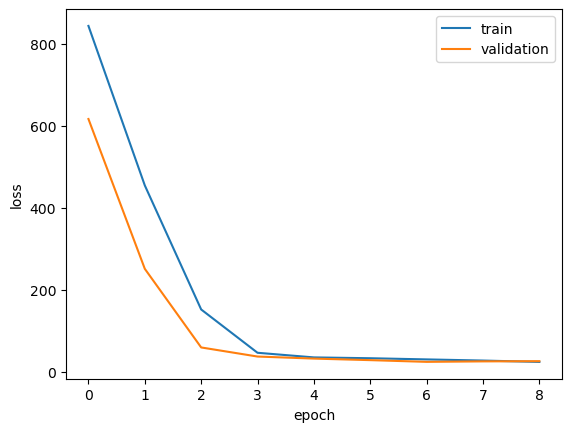

In [232]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [233]:
early_stopping_cb.stopped_epoch

8

In [234]:
regressor.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9497 - mse: 23.9497 


[20.757436752319336, 20.757436752319336]

In [235]:
model_file = '../diabetes_cnn_rg.keras'
keras.models.save_model(regressor, model_file, include_optimizer=False)
print('model saved at ', model_file)

model saved at  ../diabetes_cnn_rg.keras


여기서 한가지 의문  
scikit-learn이 제공하는 train_test_split은 shuffle이 자동반영된다고 했는데, 시계열 데이터에 대해서는 false로 지정해줘야 하는게 아닌가?
지금은 시계열 데이터가 아니지만 추후 시계열 데이터에 대해선 shuffle=false로 지정하여 split하도록 한다.